# BMIF 201 Problem Set 1
### Michelle M. Li

## Question 1

$$\sum_{i}(1 - p_i) log(1-p_i)$$

## Question 2

### Part (a)

In [1]:
import numpy
import scipy
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
#Simulation Function
def wf_sim(n, p_init, n_sim):
    simulations = []
    times_to_fixation = []
    for s in range(n_sim):
        p = p_init
        total_n_A = []
        fixated = False
        i = 0 #Generation
        while (fixated == False):
            curr_n_A = numpy.random.binomial(n, p)
            total_n_A.append(curr_n_A)
            p = curr_n_A/n
            i += 1
            if (p == 1 or p == 0) & (fixated == False): 
                times_to_fixation.append(i)
                fixated = True
        simulations.append(total_n_A)
    return(simulations, times_to_fixation)

#Calculate expectations and variances
def wf_sim_expvar(curr_n, list_p, n_sim):
    expectations = []
    variances = []
    for curr_p in list_p:
        simulations, times_to_fixation = wf_sim(curr_n, curr_p, n_sim)
        expectations.append(numpy.mean(times_to_fixation))
        variances.append(numpy.var(times_to_fixation))
    return expectations, variances

### Numerically approximate the **variance** in fixation times as a function of population size for a biallelic locus with $p = 0.5$

In [3]:
variances = []
n_pop = [10, 100, 1000, 10000]
for n_curr in n_pop:
    #Simulate
    simulations, times_to_fixation = wf_sim(n = n_curr, p_init = 0.5, n_sim = 1000)
    #Observed variance to fixation
    variances.append(numpy.var(times_to_fixation))
variances

[110.32587100000002, 9573.395104000001, 855642.7713440001, 90970293.834975]

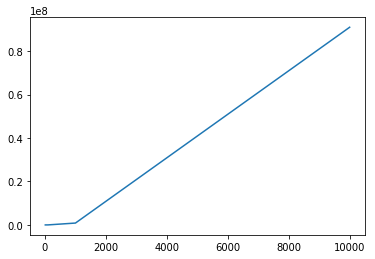

In [4]:
#Variances
plt.plot(n_pop, numpy.array(variances).T)
plt.show()

### Simulations

In [57]:
#Simulation Parameters
p = numpy.arange(0.01, 0.99, 0.04)
n_sim = 2000

In [58]:
#Run N = 10 simulation
expectations_N10, variances_N10 = wf_sim_expvar(curr_n = 10, list_p = p, n_sim = n_sim)

In [59]:
#Run N = 50 simulation
expectations_N50, variances_N50 = wf_sim_expvar(curr_n = 50, list_p = p, n_sim = n_sim)

In [60]:
#Run N = 100 simulation
expectations_N100, variances_N100 = wf_sim_expvar(curr_n = 100, list_p = p, n_sim = n_sim)

In [61]:
#Run N = 500 simulation
expectations_N500, variances_N500 = wf_sim_expvar(curr_n = 500, list_p = p, n_sim = n_sim)

In [62]:
#Run N = 1000 simulation
expectations_N1000, variances_N1000 = wf_sim_expvar(curr_n = 1000, list_p = p, n_sim = n_sim)

In [63]:
#Run N = 2500 simulation
expectations_N2500, variances_N2500 = wf_sim_expvar(curr_n = 2500, list_p = p, n_sim = n_sim)

In [64]:
#Run N = 5000 simulation
expectations_N5000, variances_N5000 = wf_sim_expvar(curr_n = 5000, list_p = p, n_sim = n_sim)

In [65]:
#Run N = 10000 simulation
expectations_N10000, variances_N10000 = wf_sim_expvar(curr_n = 10000, list_p = p, n_sim = n_sim)

### **Interpretation:** Variance in fixation time as a function of starting allele frequency

The variance in fixation time for a given population as a function of the starting allele frequency is quadratic, but scaled on the y-axis by some constant $b$. The constant $b$ is a function of the population size.

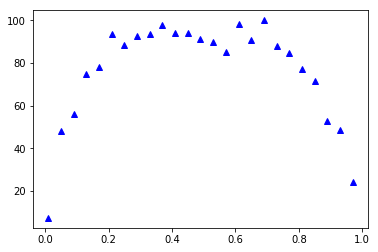

In [66]:
#Variances at N = 10
plt.plot(p, numpy.array(variances_N10).T, 'b^')
plt.show()

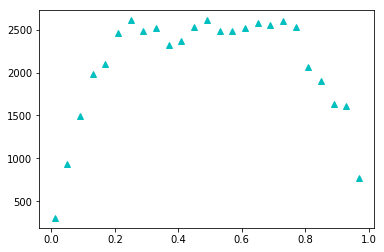

In [67]:
#Variances at N = 50
plt.plot(p, numpy.array(variances_N50).T, 'c^')
plt.show()

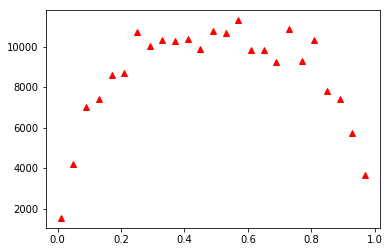

In [68]:
#Variances at N = 100
plt.plot(p, numpy.array(variances_N100).T, 'r^')
plt.show()

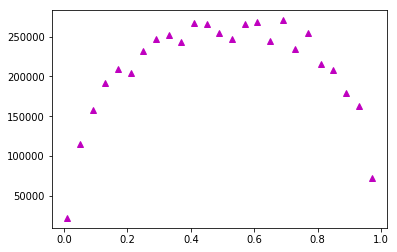

In [69]:
#Variances at N = 500
plt.plot(p, numpy.array(variances_N500).T, 'm^')
plt.show()

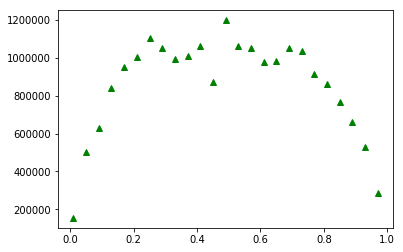

In [70]:
#Variances at N = 1000
plt.plot(p, numpy.array(variances_N1000).T, 'g^')
plt.show()

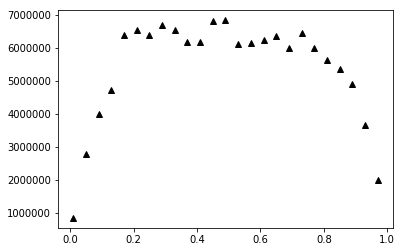

In [71]:
#Variances at N = 2500
plt.plot(p, numpy.array(variances_N2500).T, 'k^')
plt.show()

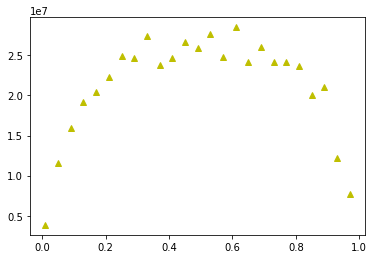

In [72]:
#Variances at N = 5000
plt.plot(p, numpy.array(variances_N5000).T, 'y^')
plt.show()

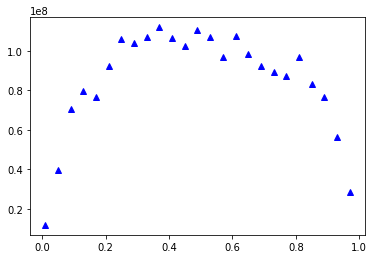

In [73]:
#Variances at N = 10000
plt.plot(p, numpy.array(variances_N10000).T, 'b^')
plt.show()

### **Interpretation:** Expected fixation time as a function of starting allele frequency

Similar to variance, the expected fixation time for a given population as a function of the starting allele frequency is quadratic, but scaled on the y-axis by some constant $c$ (due to the linearity of expectation). The constant $c$ is a function of the population size.

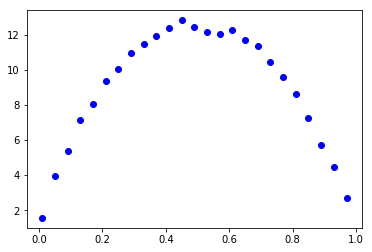

In [74]:
#Expectations at N = 10
plt.plot(p, numpy.array(expectations_N10).T, 'bo')
plt.show()

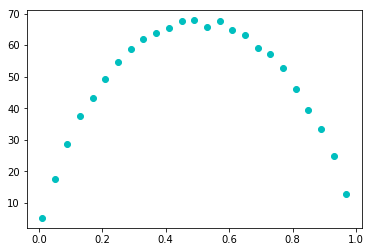

In [75]:
#Expectations at N = 50
plt.plot(p, numpy.array(expectations_N50).T, 'co')
plt.show()

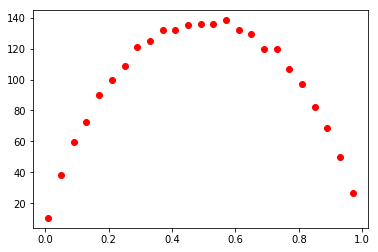

In [76]:
#Expectations at N = 100
plt.plot(p, numpy.array(expectations_N100).T, 'ro')
plt.show()

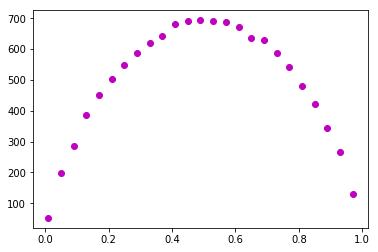

In [77]:
#Expectations at N = 500
plt.plot(p, numpy.array(expectations_N500).T, 'mo')
plt.show()

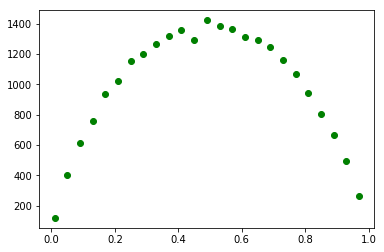

In [78]:
#Expectations at N = 1000
plt.plot(p, numpy.array(expectations_N1000).T, 'go')
plt.show()

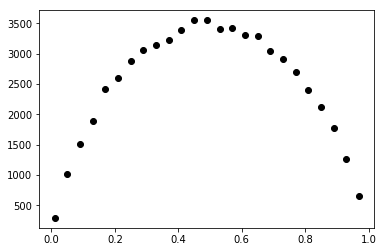

In [79]:
#Expectations at N = 2500
plt.plot(p, numpy.array(expectations_N2500).T, 'ko')
plt.show()

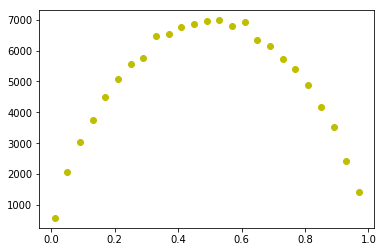

In [80]:
#Expectations at N = 5000
plt.plot(p, numpy.array(expectations_N5000).T, 'yo')
plt.show()

## Part (b)

In [3]:
#Simulation Parameters
p = numpy.arange(0.01, 0.99, 0.04)
n_sim = 1000
t = 1000

In [81]:
#Simulation Function
def wf_sim_ext(n, p_init, n_sim):
    total_fix_count = 0
    times_to_extinction = []
    for s in range(n_sim):
        p = p_init
        fixated = False
        i = 0 #Generation
        while (fixated == False):
            curr_n_A = numpy.random.binomial(n, p)
            p = curr_n_A/n
            if (p == 1) & (fixated == False): 
                total_fix_count += 1
                fixated = True
            if (p == 0) & (fixated == False): 
                times_to_extinction.append(i)
                total_fix_count += 1
                fixated = True
    return(times_to_extinction, total_fix_count)

#Calculate expectations and variances
def wf_sim_exp_ext(curr_n, list_p, n_sim):
    expectations = []
    extinction_freq = []
    for curr_p in list_p:
        times_to_extinction, total_fix_count = wf_sim_ext(curr_n, curr_p, n_sim)
        expectations.append(numpy.mean(times_to_extinction))
        extinction_freq.append(len(times_to_extinction)/total_fix_count)
    return expectations, extinction_freq

In [88]:
#Run N = 10 simulation
expectations_N10_ext, extinction_freq_N10 = wf_sim_exp_ext(curr_n = 10, list_p = p, n_sim = n_sim)

In [89]:
#Run N = 50 simulation
expectations_N50_ext, extinction_freq_N50 = wf_sim_exp_ext(curr_n = 50, list_p = p, n_sim = n_sim)

In [90]:
#Run N = 100 simulation
expectations_N100_ext, extinction_freq_N100 = wf_sim_exp_ext(curr_n = 100, list_p = p, n_sim = n_sim)

In [91]:
#Run N = 500 simulation
expectations_N500_ext, extinction_freq_N500 = wf_sim_exp_ext(curr_n = 500, list_p = p, n_sim = n_sim)

In [93]:
#Run N = 1000 simulation
expectations_N1000_ext, extinction_freq_N1000 = wf_sim_exp_ext(curr_n = 1000, list_p = p, n_sim = n_sim)

In [83]:
#Run N = 1500 simulation
expectations_N1500_ext, extinction_freq_N1500 = wf_sim_exp_ext(curr_n = 1500, list_p = p, n_sim = n_sim)

In [84]:
#Run N = 2500 simulation
expectations_N2500_ext, extinction_freq_N2500 = wf_sim_exp_ext(curr_n = 2500, list_p = p, n_sim = n_sim)

In [85]:
#Run N = 5000 simulation
expectations_N5000_ext, extinction_freq_N5000 = wf_sim_exp_ext(curr_n = 5000, list_p = p, n_sim = n_sim)

In [86]:
#Run N = 10000 simulation
expectations_N10000_ext, extinction_freq_N10000 = wf_sim_exp_ext(curr_n = 10000, list_p = p, n_sim = n_sim)

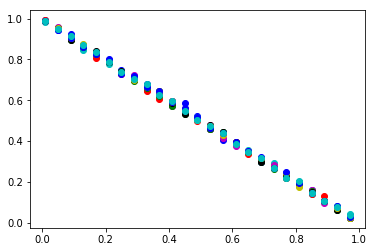

In [94]:
#Extinction Frequencies
plt.plot(p, numpy.array(extinction_freq_N10).T, 'bo',
         p, numpy.array(extinction_freq_N50).T, 'co',
         p, numpy.array(extinction_freq_N100).T, 'ro',
         p, numpy.array(extinction_freq_N500).T, 'mo',
         p, numpy.array(extinction_freq_N1000).T, 'go',
         p, numpy.array(extinction_freq_N1500).T, 'ko',
         p, numpy.array(extinction_freq_N2500).T, 'yo',
         p, numpy.array(extinction_freq_N5000).T, 'bo',
        p, numpy.array(extinction_freq_N10000).T, 'co')
plt.show()

In [18]:


TO DO !!!!!!!



SyntaxError: invalid syntax (<ipython-input-18-bd6f95cc2ab1>, line 3)

### **Interpretation:** Expected time to extinction as a function of starting allele frequency

## Question 3

### Part (a)

The average fitness $\bar{W}$ is
$$\bar{W} = 2p(1 - p)(1 + s) + (1 - p)^2$$

The equilibrium frequency is when $\Delta p = 0$,
$$\Delta p = p^2 \frac{W_{AA}}{\bar{W}} + p(1 - p) \frac{W_{Aa}}{\bar{W}} - p = 0$$

So, to solve for $\widetilde{p}$, start with (Step 1)
$$\Delta p = \frac{\widetilde{p}(1 - \widetilde{p})(1 + s)}{2\widetilde{p}(1 - \widetilde{p})(1 + s) + (1 - \widetilde{p})^2} - \widetilde{p} = 0$$

Step 2
$$\widetilde{p} = \frac{\widetilde{p}(1 - \widetilde{p})(1 + s)}{2\widetilde{p}(1 - \widetilde{p})(1 + s) + (1 - \widetilde{p})^2}$$

Step 3
$$1 = \frac{(1 - \widetilde{p})(1 + s)}{2\widetilde{p}(1 - \widetilde{p})(1 + s) + (1 - \widetilde{p})^2}$$

Step 4
$$2\widetilde{p}(1 - \widetilde{p})(1 + s) + (1 - \widetilde{p})^2 = (1 - \widetilde{p})(1 + s)$$

Step 5
$$2\widetilde{p}(1 + s) + (1 - \widetilde{p}) = 1 + s$$

Step 6
$$2\widetilde{p} + 2\widetilde{p}s - \widetilde{p} = s$$

Step 7
$$\widetilde{p}(1 + 2s) = s$$

Step 8
$$\widetilde{p} = \frac{s}{1 + 2s}$$

#### Final Solution:

$$\widetilde{p} = 0 \quad\text{ or }\quad \widetilde{p} = \frac{s}{1 + 2s}$$

### Part (b)

The average fitness $\bar{W}$ is
$$\bar{W} = p^2(1 + s) + 2p(1 - p)(1 - s^2) + (1 - p)^2$$

To solve for $\widetilde{p}$, start with (Step 1)
$$\Delta p = \frac{\widetilde{p}^2 (1 + s) + \widetilde{p}(1 - \widetilde{p}) (1 - s^2)}{\widetilde{p}^2(1 + s) + 2\widetilde{p}(1 - \widetilde{p})(1 - s^2) + (1 - \widetilde{p})^2} - \widetilde{p} = 0$$

Step 2
$$\widetilde{p} = \frac{\widetilde{p}^2 (1 + s) + \widetilde{p}(1 - \widetilde{p}) (1 - s^2)}{\widetilde{p}^2(1 + s) + 2\widetilde{p}(1 - \widetilde{p})(1 - s^2) + (1 - \widetilde{p})^2}$$

Step 3
$$1 = \frac{\widetilde{p} (1 + s) + (1 - \widetilde{p}) (1 - s^2)}{\widetilde{p}^2(1 + s) + 2\widetilde{p}(1 - \widetilde{p})(1 - s^2) + (1 - \widetilde{p})^2}$$

Step 4
$$\widetilde{p}^2(1 + s) + 2\widetilde{p}(1 - \widetilde{p})(1 - s^2) + (1 - \widetilde{p})^2 = \widetilde{p} (1 + s) + (1 - \widetilde{p}) (1 - s^2)$$

Step 5
$$(1 + s)(\widetilde{p}^2 - \widetilde{p}) + (1 - \widetilde{p})^2 = (1 - \widetilde{p}) (1 - s^2)(1 - 2\widetilde{p})$$

Step 6
$$-(1 + s)\widetilde{p}(1 - \widetilde{p}) + (1 - \widetilde{p})^2 = (1 - \widetilde{p}) (1 - s^2)(1 - 2\widetilde{p})$$

Step 7
$$-(1 + s)\widetilde{p} + (1 - \widetilde{p}) = (1 - s^2)(1 - 2\widetilde{p})$$

Step 8
$$-\widetilde{p} - \widetilde{p}s + 1 - \widetilde{p} = 1 - 2\widetilde{p} - s^2 + 2\widetilde{p}s^2$$

Step 9
$$-\widetilde{p}s = -s^2 + 2\widetilde{p}s^2$$

Step 10
$$-\widetilde{p} - 2\widetilde{p}s = -s$$

Step 11
$$\widetilde{p}(-1 - 2s) = -s$$

Step 12
$$\widetilde{p} = \frac{s}{1 + 2s}$$

#### Final Solution:

$$\widetilde{p} = 0 \quad\text{ or }\quad \widetilde{p} = 1 \text{ (and } s+1 \neq 0 \text{)} \quad\text{ or }\quad \widetilde{p} = \frac{s}{1 + 2s}$$

### Part (c)

Over time, $p$ will remain at $\widetilde{p} \pm \epsilon$ becaus???

## Question 4

### Part (a)

Consider $\mu(1 - p)$ to be the probability of choosing an a allele and mutating it, and $\mu p$ to be the probability of choosing an A allele and mutating it.

Let $p(1+s)$ be the selection propogated from the previous generation.

This gives us
$$p' = p(1 + s) + \mu(1 - p) - \mu p$$

Because $p' = p$ at equilibrium,
$$p = p(1 + s) + \mu(1 - p) - \mu p$$

Step 1
$$p = p + ps + \mu - 2p\mu$$

Step 2
$$0 = p(s - 2\mu) + \mu$$

Step 3
$$p = \frac{\mu}{-s + 2\mu}$$


In [245]:
#Simulation Function
def wf_sim_mut(n, p_init, n_sim, t, mu, w):
    simulations = []
    equilibrium = []
    for s in range(n_sim):
        total_n_A = []
        fixated = False
        p = p_init
        for i in range(t):
            if (p > 1): 
                curr_n_A = numpy.random.binomial(n, 1)
            else:
                curr_n_A = numpy.random.binomial(n, p)
            total_n_A.append(curr_n_A)
            
            #Calculating next p
            prev_p = curr_n_A/n
            p = w*prev_p + mu*(1 - prev_p) - mu*prev_p
            
        #Saving instances of equilibrium
        if (curr_n_A > 0) & (curr_n_A < n): 
            equilibrium.append(curr_n_A)
        simulations.append(total_n_A)
    return(simulations, equilibrium)


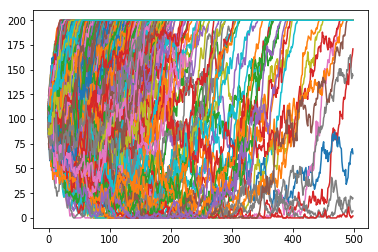

In [246]:
#Simulation
simulations, equilibrium = wf_sim_mut(n = 100*2, p_init = 0.5, n_sim = 1000, t = 500, mu = 0.001, w = 1.01)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.show()

### Part (b)

How does the equilibrium change if the population is $N = 10000$? 

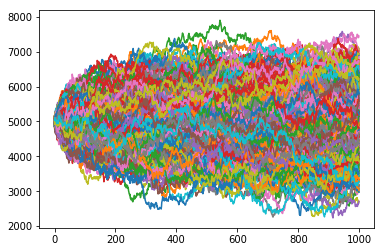

In [247]:
#Simulation
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 1000, mu = 0.001, w = 1)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.show()

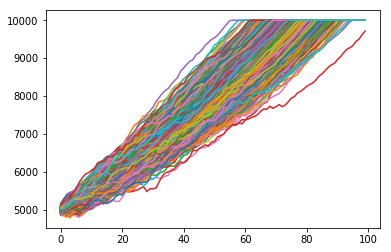

In [248]:
#Run mu = 0.001, w = 1.01
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 100, mu = 0.001, w = 1.01)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.show()

How does the equilibrium change with mutation rate $\mu$ and fitness $w$? 

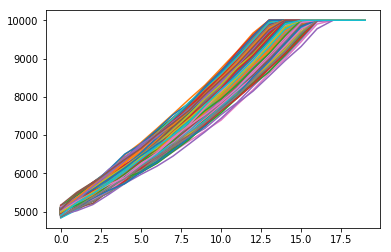

In [190]:
#Run mu = 0.001, w = 1.05
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 20, mu = 0.001, w = 1.05)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.show()

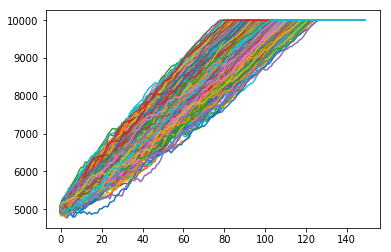

In [191]:
#Run mu = 0.005, w = 1.01
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 150, mu = 0.005, w = 1.01)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.show()

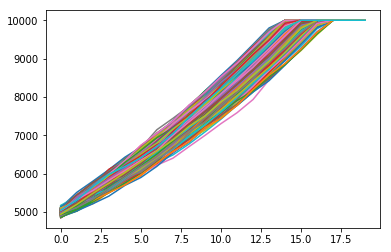

In [192]:
#Run mu = 0.005, w = 1.05
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 20, mu = 0.005, w = 1.05)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.show()

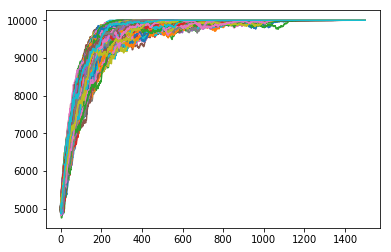

In [216]:
#Run mu = 0.01, w = 1.01
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 1500, mu = 0.01, w = 1.01)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.show()

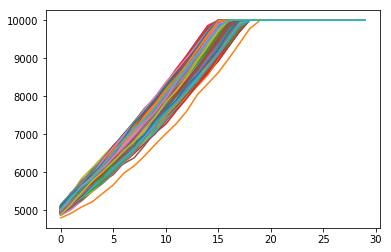

In [200]:
#Run mu = 0.01, w = 1.05
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 30, mu = 0.01, w = 1.05)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.show()

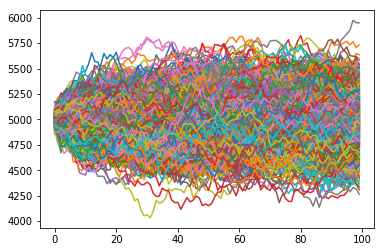

In [201]:
#Run mu = 0.01, w = 1
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 100, mu = 0.01, w = 1)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.show()

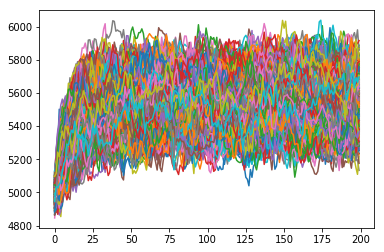

In [215]:
#Run mu = 0.05, w = 1.01
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 200, mu = 0.05, w = 1.01)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.show()

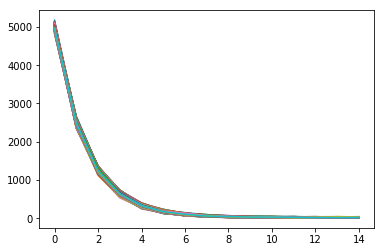

In [204]:
#Run mu = 0.001, w = 0.5
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 15, mu = 0.001, w = 0.5)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.show()

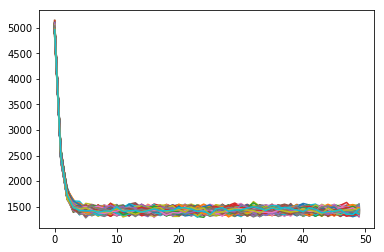

In [205]:
#Run mu = 0.1, w = 0.5
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 50, mu = 0.1, w = 0.5)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.show()

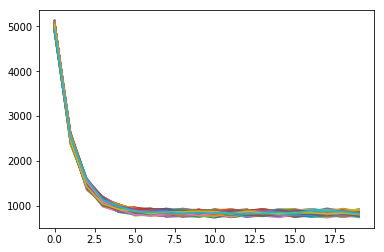

In [211]:
#Run mu = 0.05, w = 0.5
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 20, mu = 0.05, w = 0.5)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.show()

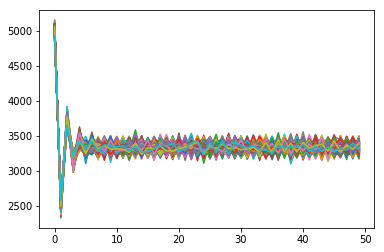

In [212]:
#Run mu = 0.5, w = 0.5
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 50, mu = 0.5, w = 0.5)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.show()

## Question 5

### Part (a)

The probability that a rare allele A* appears in the population for the first time after the $n$th generation is
$$P(X = n) = (1 - p)^{n-1}p$$
where $$p = \bar{W}\left( (1 - p_0)\mu + p_0(1-\mu) \right)$$ and $p_0$ is the initial A allele frequency.

This follows a geometric distribution.

In [352]:
#k_gen = generation of first occurrence
k_gen = numpy.arange(1, 50000, 10)

def calc_freq_geo(p_init, mu, w, n_sim, k_gen):
    frequencies = []
    generations = []
    rare_A_counts = []
    p = w*((1 - p_init)*mu + p_init*(1 - mu))
    for k in k_gen:
        trace = []
        for i in range(n_sim):
            n_gen = numpy.random.geometric(p)
            
            n_A = numpy.random.poisson(p)
            
            generations.append(n_gen)
            rare_A_counts.append(n_A)
            
            if (n_gen == k): trace.append(1)
            else: trace.append(0)
        freq = numpy.sum(trace)/len(trace)
        frequencies.append(freq)
    return frequencies, generations, rare_A_counts

In [373]:
frequencies, generations, rare_A_counts = calc_freq_geo(p_init = 0.5, mu = 0.5, w = 0.001, 
                            n_sim = 1000, k_gen = k_gen)

In [374]:
numpy.mean(generations)

2001.2453204

In [376]:
numpy.mean(rare_A_counts)

0.0005026

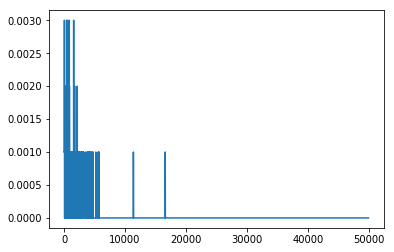

In [377]:
plt.plot(k_gen, numpy.array(frequencies).T,)
plt.show()

In [357]:
frequencies, generations, rare_A_counts = calc_freq_geo(p_init = 0.1, mu = 0.5, w = 0.001, 
                            n_sim = 1000, k_gen = k_gen)

In [358]:
numpy.mean(generations)

1999.9409978

In [359]:
numpy.mean(rare_A_counts)

0.0005022

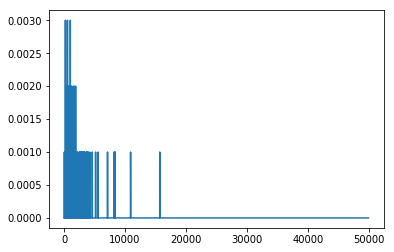

In [360]:
plt.plot(k_gen, numpy.array(frequencies).T)
plt.show()

In [361]:
frequencies, generations, rare_A_counts = calc_freq_geo(p_init = 0.1, mu = 0.5, w = 0.01, 
                            n_sim = 1000, k_gen = k_gen)

In [362]:
numpy.mean(generations)

199.822165

In [363]:
numpy.mean(rare_A_counts)

0.005005

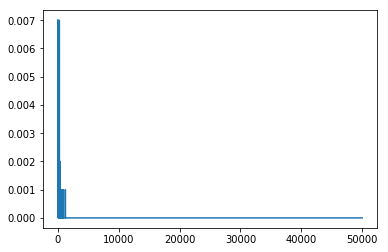

In [364]:
plt.plot(k_gen, numpy.array(frequencies).T)
plt.show()

In [365]:
frequencies, generations, rare_A_counts = calc_freq_geo(p_init = 0.1, mu = 0.01, w = 0.01, 
                            n_sim = 1000, k_gen = k_gen)

In [366]:
numpy.mean(generations)

925.4390688

In [367]:
numpy.mean(rare_A_counts)

0.001085

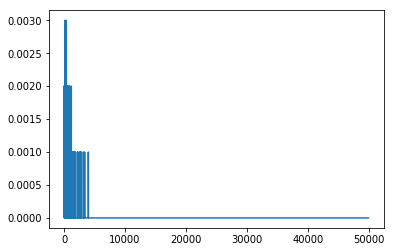

In [368]:
plt.plot(k_gen, numpy.array(frequencies).T)
plt.show()

In [369]:
frequencies, generations, rare_A_counts = calc_freq_geo(p_init = 0.01, mu = 0.01, w = 0.01, 
                            n_sim = 1000, k_gen = k_gen)

In [370]:
numpy.mean(generations)

5048.3870676

In [371]:
numpy.mean(rare_A_counts)

0.0002006

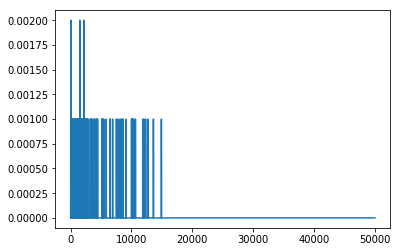

In [372]:
plt.plot(k_gen, numpy.array(frequencies).T)
plt.show()

### Part (b)

As demonstrated in part (a), the expected number of generations for allele A* to emerge is
$$E(X) = \frac{1}{p}$$

Use poisson for "what is the probability that A* fixes after it first appears"

$\lambda$ is the rate of the first A* fixing after it appears

$$P(X_{t+1} = 1 \vert X_t > 0)$$

$k$ is the number of first A* fixing after it appears
poisson to tell the probability of that happening.
"between the time when A* appears and k, how many times does it happen?" --> the probability that A* fixes after it appears

### Part (c)